# BHARAT INTERN TASK1-SMS CLASSIFIER

In [33]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import tree
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [2]:
data=pd.read_csv("train.csv")

In [3]:
data.head() #here 0 is not spam and 1 is spam

,sms,label
0,"Go until jurong point, crazy.. Available only ...",0
1,Ok lar... Joking wif u oni...\n,0
2,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,U dun say so early hor... U c already then say...,0
4,"Nah I don't think he goes to usf, he lives aro...",0


In [4]:
data.tail()

,sms,label
5569,This is the 2nd time we have tried 2 contact u...,1
5570,Will ü b going to esplanade fr home?\n,0
5571,"Pity, * was in mood for that. So...any other s...",0
5572,The guy did some bitching but I acted like i'd...,0
5573,Rofl. Its true to its name\n,0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5574 entries, 0 to 5573
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   sms     5574 non-null   object
 1   label   5574 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 87.2+ KB


In [6]:
data["label"].value_counts()

0    4827
1     747
Name: label, dtype: int64

In [7]:
#according to above information there are 4827 not spam sms and 747 spam sms

# HANDLING NULL VALUES

In [8]:
data.isnull().any()

sms      False
label    False
dtype: bool

In [9]:
data.isnull().sum()

sms      0
label    0
dtype: int64

In [10]:
#according to above information there is no null values

# DATA VISUALISATION

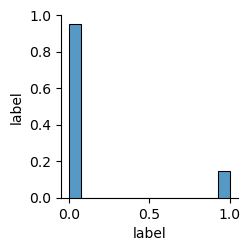

In [11]:
sns.pairplot(data)

<Axes: >

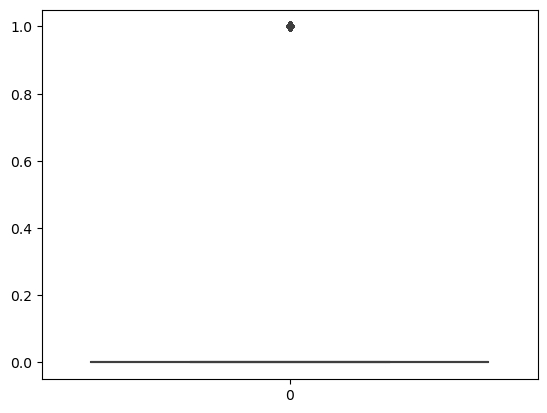

In [12]:
sns.boxplot(data["label"])

In [13]:
#there are no outlayes in the dataset

([<matplotlib.patches.Wedge at 0x1eddb685e50>,
 [Text(-1.0039394445155985, 0.4495615550130057, 'not spam'),
  Text(1.003939423470102, -0.449561602010803, 'spam')],
 [Text(-0.5476033333721445, 0.24521539364345762, '86.6%'),
  Text(0.5476033218927828, -0.24521541927861978, '13.4%')])

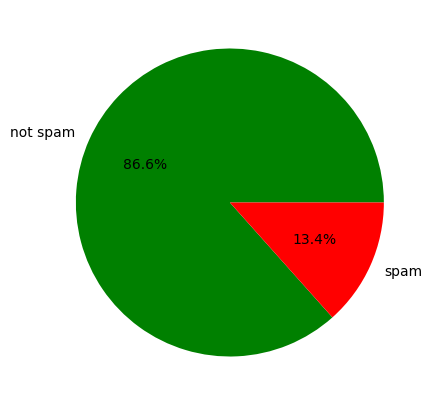

In [14]:
labels=["not spam","spam"]
numbers=[4827,747]
fig=plt.figure(figsize=(5,5))
plt.pie(numbers,labels=labels,autopct="%0.1f%%",colors=["green","red"])

# LABEL ENCODING

In [15]:
le=LabelEncoder()

In [16]:
data["sms"]=le.fit_transform(data["sms"])

In [17]:
data.head()

,sms,label
0,1133,0
1,3156,0
2,1054,1
3,4143,0
4,2812,0


# SPLITTING THE DATA INTO DEPENDENT AND INDEPENDENT VARIABLE

In [18]:
x=data.iloc[:,0:1]
y=data["label"]

In [19]:
x.head()

,sms
0,1133
1,3156
2,1054
3,4143
4,2812


In [20]:
y.head()

0    0
1    0
2    1
3    0
4    0
Name: label, dtype: int64

# TRAIN TEST SPLIT

In [21]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 0)

In [22]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((4459, 1), (1115, 1), (4459,), (1115,))

# MODEL BUILDING

In [23]:
dtc=DecisionTreeClassifier()

In [24]:
dtc.fit(x_train,y_train)

DecisionTreeClassifier()

In [25]:
pred=dtc.predict(x_test)

In [26]:
pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

# EVALUATION METRICS

In [27]:
accuracy_score(pred,y_test)

0.9031390134529148

In [30]:
print(classification_report(pred,y_test))

              precision    recall  f1-score   support

           0       0.95      0.94      0.94       958
           1       0.65      0.68      0.66       157

    accuracy                           0.90      1115
   macro avg       0.80      0.81      0.80      1115
weighted avg       0.91      0.90      0.90      1115



In [32]:
confusion_matrix(pred,y_test)

array([[900,  58],
       [ 50, 107]], dtype=int64)

[Text(0.573106003304785, 0.9772727272727273, 'x[0] <= 4043.5\ngini = 0.227\nsamples = 4459\nvalue = [3877, 582]'),
 Text(0.3593008168869857, 0.9318181818181818, 'x[0] <= 1123.5\ngini = 0.187\nsamples = 3506\nvalue = [3139, 367]'),
 Text(0.2158175851796686, 0.8863636363636364, 'x[0] <= 986.5\ngini = 0.319\nsamples = 966\nvalue = [774, 192]'),
 Text(0.1173547756469931, 0.8409090909090909, 'x[0] <= 155.0\ngini = 0.254\nsamples = 837\nvalue = [712, 125]'),
 Text(0.04803574753304785, 0.7954545454545454, 'x[0] <= 87.5\ngini = 0.386\nsamples = 134\nvalue = [99, 35]'),
 Text(0.022342208154905976, 0.75, 'x[0] <= 72.5\ngini = 0.106\nsamples = 71\nvalue = [67, 4]'),
 Text(0.014894805436603984, 0.7045454545454546, 'x[0] <= 57.5\ngini = 0.067\nsamples = 58\nvalue = [56, 2]'),
 Text(0.00893688326196239, 0.6590909090909091, 'x[0] <= 21.0\ngini = 0.043\nsamples = 45\nvalue = [44, 1]'),
 Text(0.005957922174641594, 0.6136363636363636, 'x[0] <= 19.5\ngini = 0.117\nsamples = 16\nvalue = [15, 1]'),
 Text(0

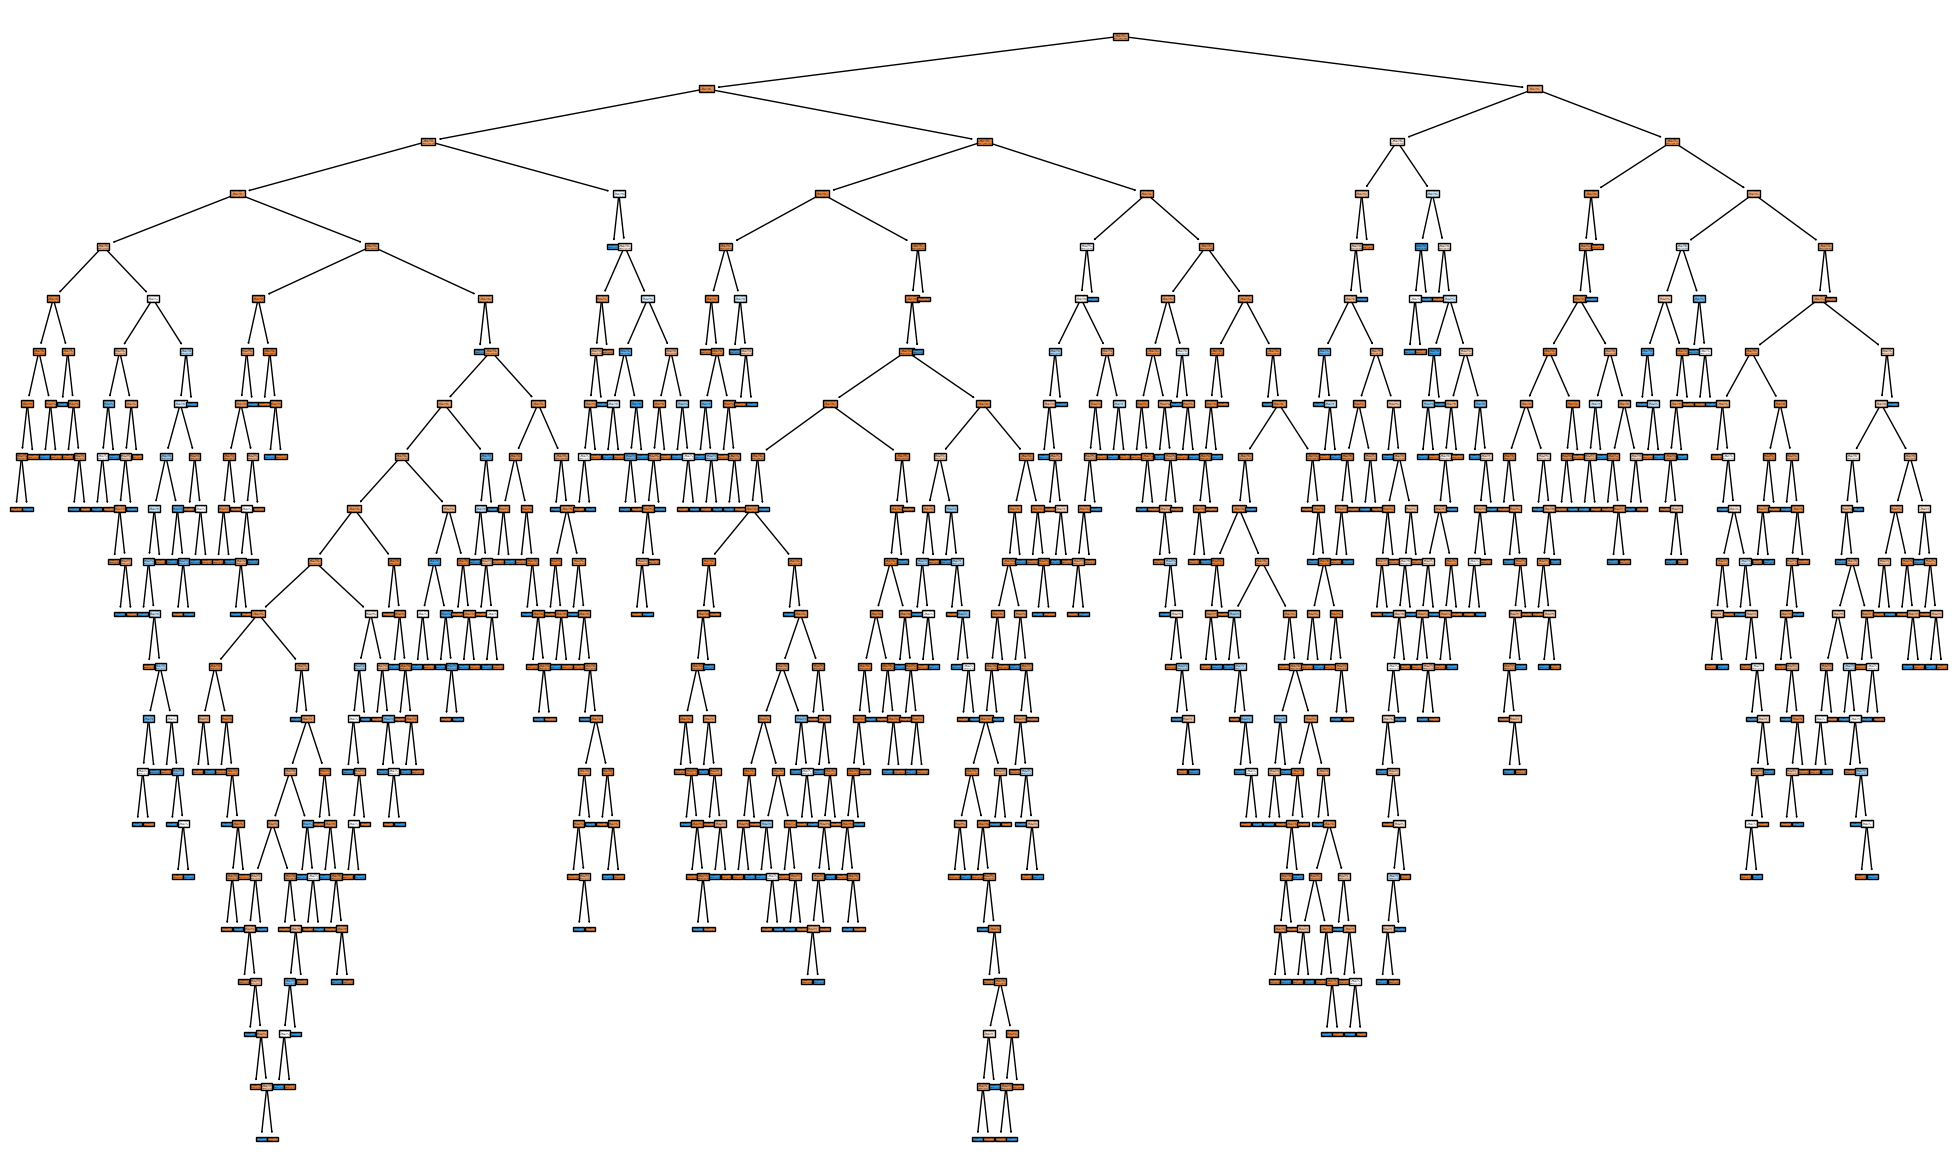

In [34]:
plt.figure(figsize=(25,15))
tree.plot_tree(dtc,filled=True)